Решаем методом Либмана...
Итерация 0, максимальное изменение: 2.45e-01
Итерация 100, максимальное изменение: 6.82e-03
Итерация 200, максимальное изменение: 4.07e-03
Итерация 300, максимальное изменение: 2.98e-03
Итерация 400, максимальное изменение: 2.37e-03
Итерация 500, максимальное изменение: 1.96e-03
Итерация 600, максимальное изменение: 1.66e-03
Итерация 700, максимальное изменение: 1.43e-03
Итерация 800, максимальное изменение: 1.24e-03
Итерация 900, максимальное изменение: 1.09e-03
Итерация 1000, максимальное изменение: 9.66e-04
Итерация 1100, максимальное изменение: 8.60e-04
Итерация 1200, максимальное изменение: 7.69e-04
Итерация 1300, максимальное изменение: 6.92e-04
Итерация 1400, максимальное изменение: 6.25e-04
Итерация 1500, максимальное изменение: 5.68e-04
Итерация 1600, максимальное изменение: 5.18e-04
Итерация 1700, максимальное изменение: 4.76e-04
Итерация 1800, максимальное изменение: 4.39e-04
Итерация 1900, максимальное изменение: 4.07e-04
Итерация 2000, максимально

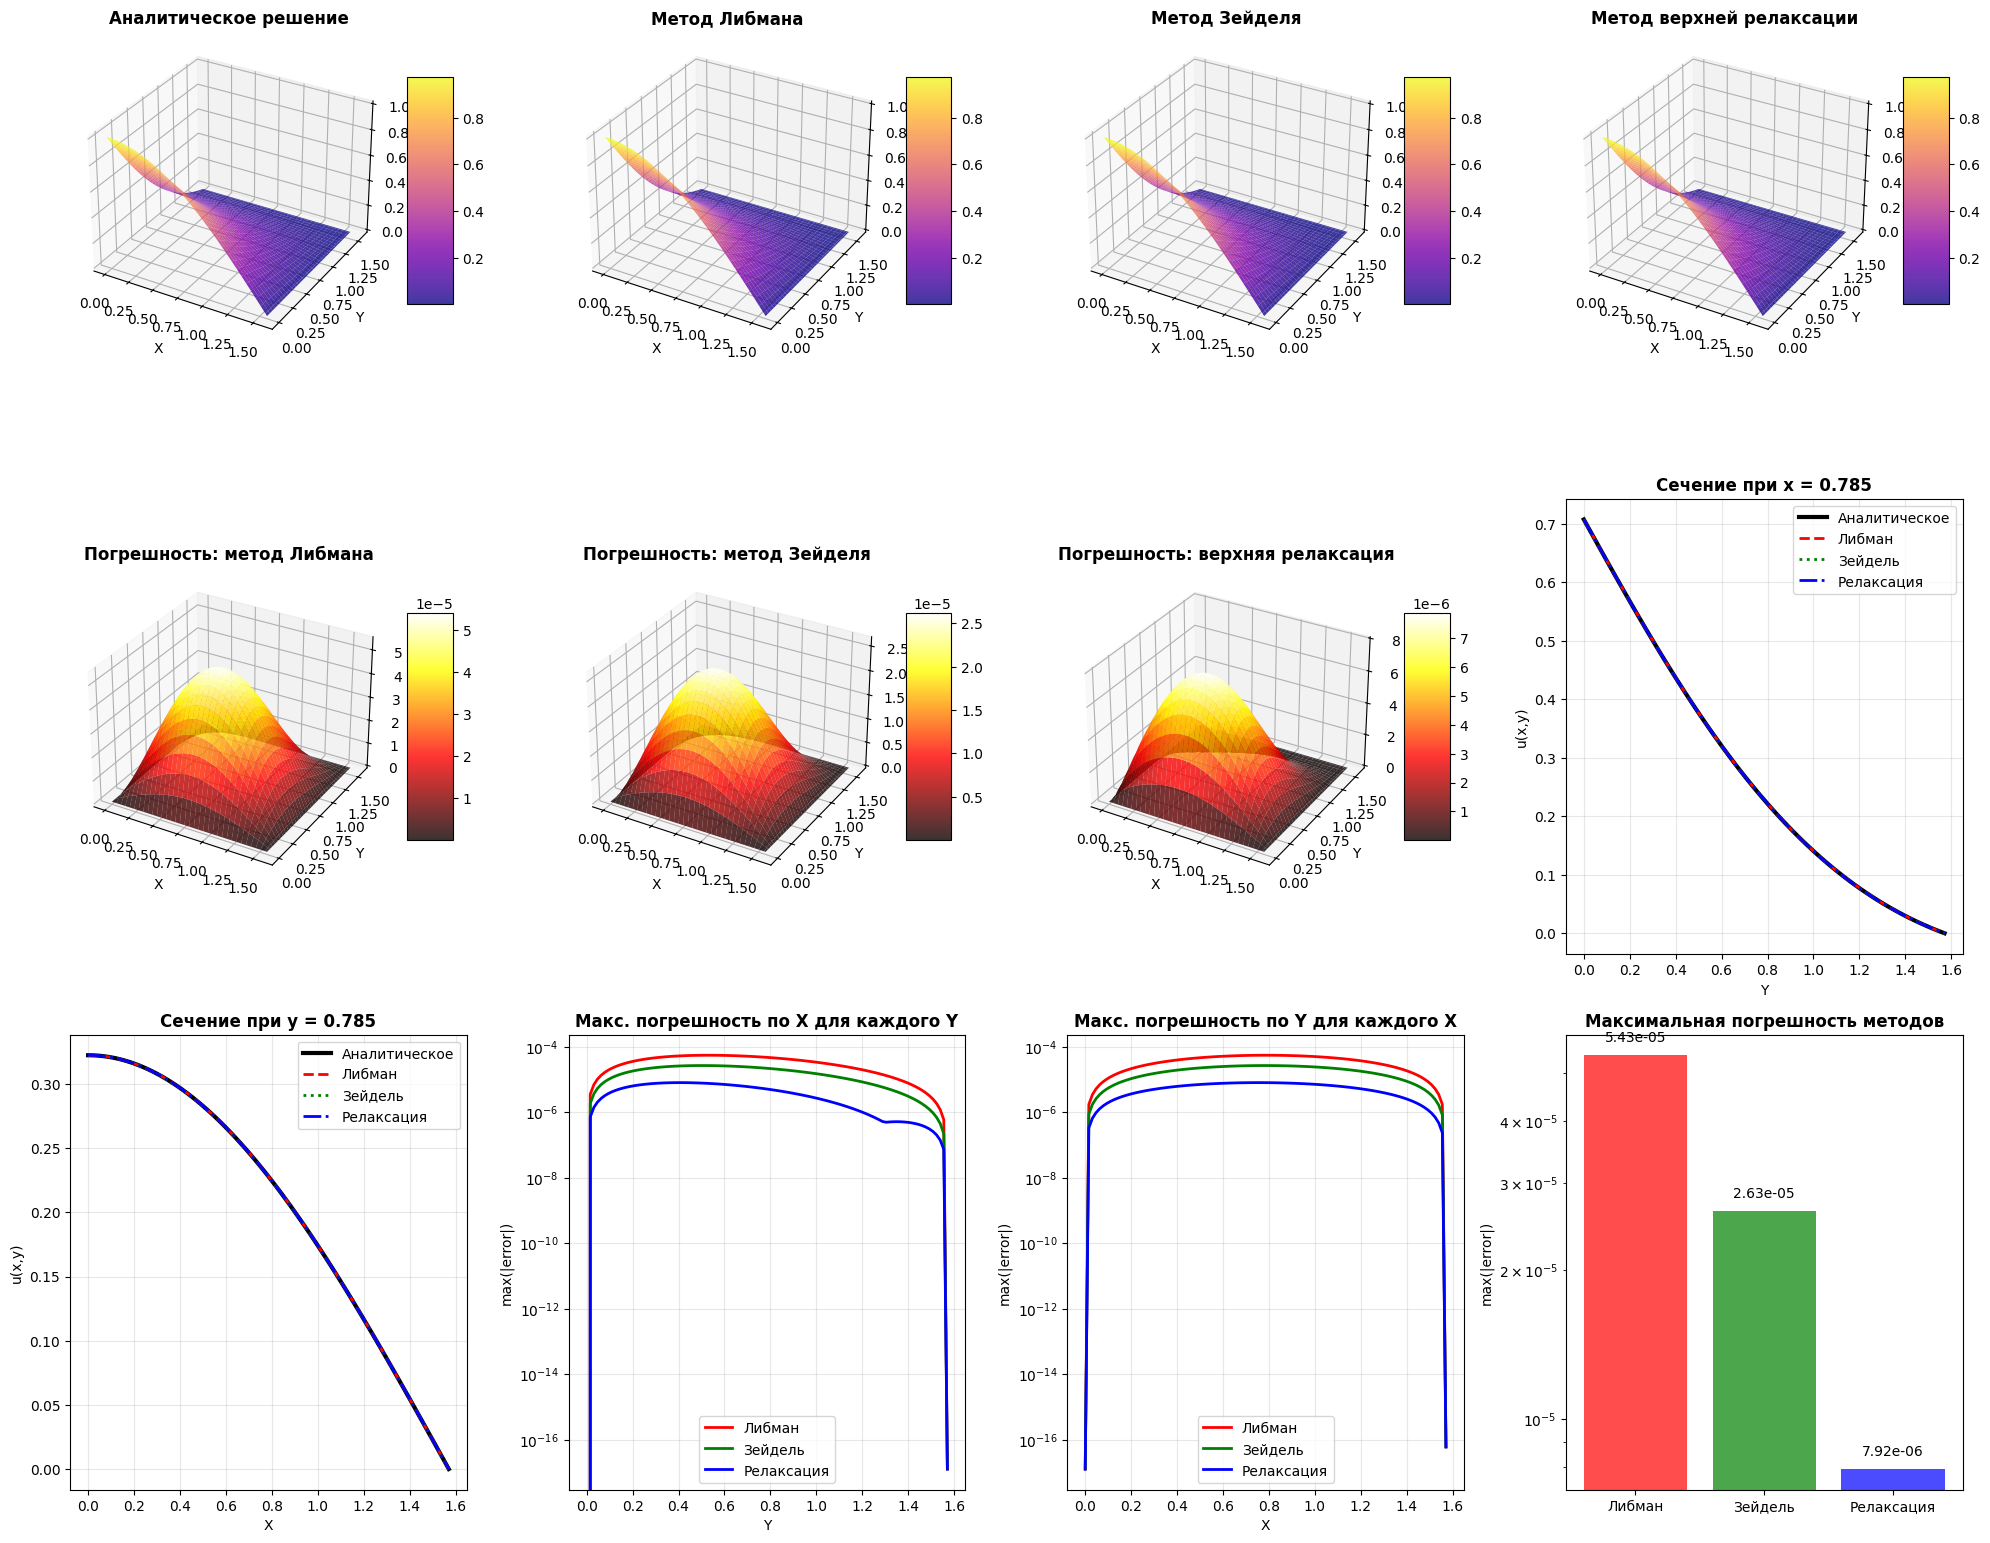

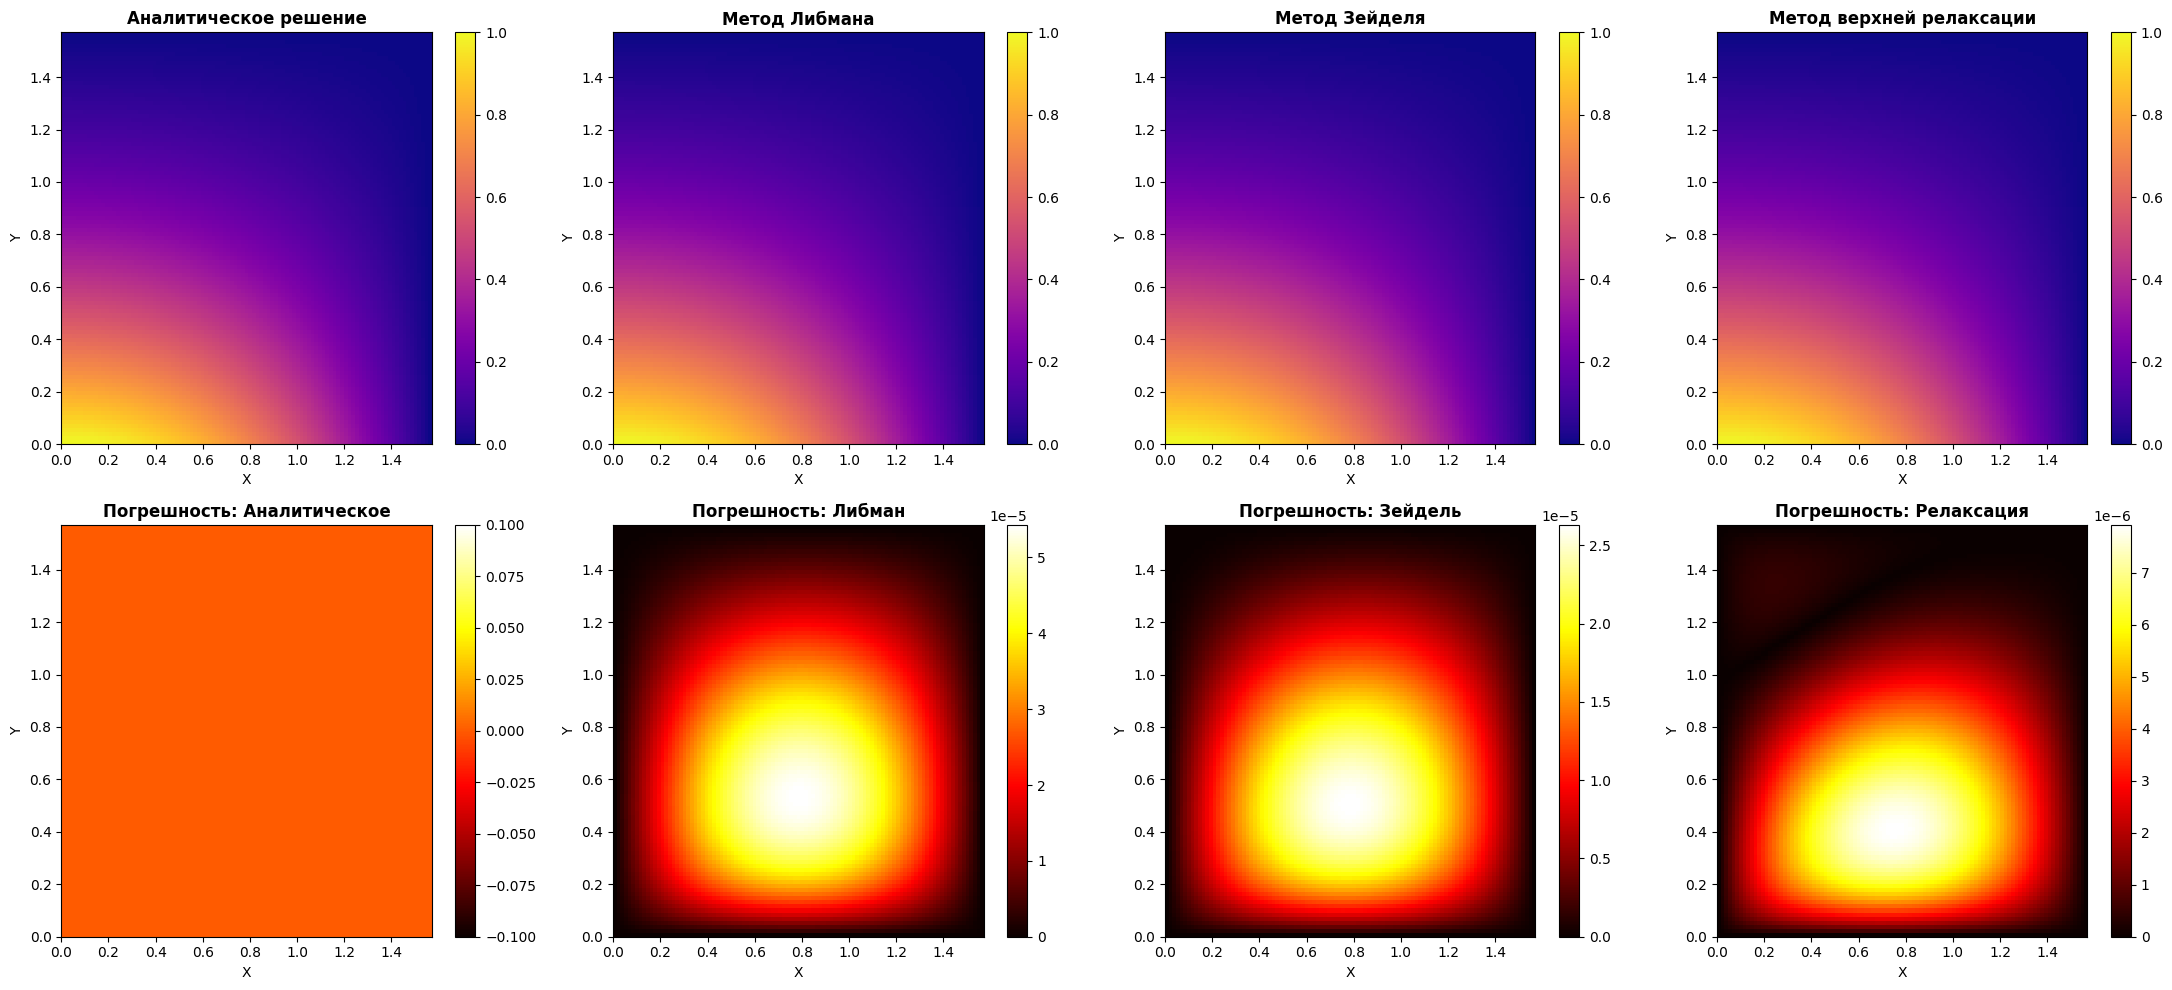

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

a_coeff = 1.0
b_coeff = 1.0
c_coeff = 0.0
d_coeff = -2.0
e_coeff = -3.0

f = lambda x, y: 0

alpha1 = 0.0
beta1 = 1.0
gamma1 = lambda y: np.exp(-y) * np.cos(y)

alpha2 = 0.0
beta2 = 1.0
gamma2 = lambda y: 0

alpha3 = 0.0
beta3 = 1.0
gamma3 = lambda x: np.cos(x)

alpha4 = 0.0
beta4 = 1.0
gamma4 = lambda x: 0

Lx = np.pi / 2
Ly = np.pi / 2

analytical_solution = lambda x, y: np.exp(-y) * np.cos(x) * np.cos(y)


max_iter = 50_000
eps = 1e-6

theta = 1.5

def l2_norm(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def solve_elliptic_equation(X, Y, method="simple_iterations"):
    N = len(X) - 1
    M = len(Y) - 1
    u_num = np.zeros((len(X), len(Y)))
    
    
    if abs(alpha1) < eps:
        u_num[0, :] = gamma1(Y) / beta1
    if abs(alpha2) < eps:
        u_num[N, :] = gamma2(Y) / beta2
    if abs(alpha3) < eps:
        u_num[:, 0] = gamma3(X) / beta3
    if abs(alpha4) < eps:    
        u_num[:, M] = gamma4(X) / beta4
    
    for i in range(1, N):
        for j in range(1, M):
            u_num[i, j] = (
                (1 - i / N) * u_num[0, j] +
                (i / N) * u_num[N, j] +
                (1 - j / M) * u_num[i, 0] +
                (j / M) * u_num[i, M]
            ) / 2
       
    for k in range(max_iter):
        u_old = u_num.copy()
        
        for i in range(1, N):
            for j in range(1, M):
                if method == "libman":
                    u_num[i, j] = (
                        u_old[i - 1, j] * (a_coeff / hx ** 2 + c_coeff / (2 * hx)) + 
                        u_old[i + 1, j] * (a_coeff / hx ** 2 - c_coeff / (2 * hx)) + 
                        u_old[i, j - 1] * (b_coeff / hy ** 2 + d_coeff / (2 * hy)) + 
                        u_old[i, j + 1] * (b_coeff / hy ** 2 - d_coeff / (2 * hy)) - 
                        f(X[i], Y[j])
                    ) / (2 * a_coeff / hx ** 2 + 2 * b_coeff / hy ** 2 + e_coeff)
                elif method == "zeidel":
                    u_num[i, j] = (
                        u_num[i - 1, j] * (a_coeff / hx ** 2 + c_coeff / (2 * hx)) + 
                        u_num[i + 1, j] * (a_coeff / hx ** 2 - c_coeff / (2 * hx)) + 
                        u_num[i, j - 1] * (b_coeff / hy ** 2 + d_coeff / (2 * hy)) + 
                        u_num[i, j + 1] * (b_coeff / hy ** 2 - d_coeff / (2 * hy)) - 
                        f(X[i], Y[j])
                    ) / (2 * a_coeff / hx ** 2 + 2 * b_coeff / hy ** 2 + e_coeff)
                elif method == "upper_relaxation":
                    u_num[i, j] = (
                        theta * ((
                            u_num[i - 1, j] * (a_coeff / hx ** 2 + c_coeff / (2 * hx)) + 
                            u_num[i + 1, j] * (a_coeff / hx ** 2 - c_coeff / (2 * hx)) + 
                            u_num[i, j - 1] * (b_coeff / hy ** 2 + d_coeff / (2 * hy)) + 
                            u_num[i, j + 1] * (b_coeff / hy ** 2 - d_coeff / (2 * hy)) - 
                            f(X[i], Y[j])
                            ) / (2 * a_coeff / hx ** 2 + 2 * b_coeff / hy ** 2 + e_coeff)
                        ) + (1 - theta) * u_num[i, j]
                    )
                    
        if abs(alpha1) > eps:
            u_num[0, :] = (gamma1(Y) - u_num[1, :] * (2 * alpha1 / hx) - u_num[2, :] * (-alpha1 / 2 / hx)) / (-3 * alpha1 / 2 / hx + beta1)
        if abs(alpha2) > eps:
            u_num[N, :] = (gamma2(Y) - u_num[N - 1, :] * (-2 * alpha2 / hx) - u_num[N - 2, :] * (alpha2 / 2 / hx)) / (3 * alpha2 / 2 / hx + beta2)
        if abs(alpha3) > eps:
            u_num[:, 0] = (gamma3(X) - u_num[:, 1] * (2 * alpha3 / hy) - u_num[:, 2] * (-alpha3 / 2 / hy)) / (-3 * alpha3 / 2 / hy + beta3)
        if abs(alpha4) > eps:    
            u_num[:, M] = (gamma4(X) - u_num[:, M - 1] * (-2 * alpha4 / hy) - u_num[:, M - 2] * (alpha4 / 2 / hy)) / (3 * alpha4 / 2 / hy + beta4)
    
                         
        if k % 100 == 0:
            print(f"Итерация {k}, максимальное изменение: {l2_norm(u_num, u_old):.2e}")
        
        if l2_norm(u_num, u_old) < eps:
            print(f"Сходимость достигнута на итерации {k}")
            break
                  
    return u_num

# # Параметры сетки
Lx_count = 100
Ly_count = 100
X = np.linspace(0, Lx, Lx_count + 1)
Y = np.linspace(0, Ly, Ly_count + 1)
hx = Lx / Lx_count
hy = Ly / Ly_count

# Создаем сетку для 3D графиков
X_grid, Y_grid = np.meshgrid(X, Y, indexing='ij')

# Вычисляем аналитическое решение
u_analytical = analytical_solution(X_grid, Y_grid)

# Решаем уравнение разными методами
print("Решаем методом Либмана...")
u_libman = solve_elliptic_equation(X, Y, method="libman")

print("\nРешаем методом Зейделя...")
u_zeidel = solve_elliptic_equation(X, Y, method="zeidel")

print("\nРешаем методом верхней релаксации...")
u_relaxation = solve_elliptic_equation(X, Y, method="upper_relaxation")

# Вычисляем погрешности
error_libman = np.abs(u_libman - u_analytical)
error_zeidel = np.abs(u_zeidel - u_analytical)
error_relaxation = np.abs(u_relaxation - u_analytical)

print(f"\nМаксимальная погрешность:")
print(f"Метод Либмана: {np.max(error_libman):.2e}")
print(f"Метод Зейделя: {np.max(error_zeidel):.2e}")
print(f"Метод верхней релаксации: {np.max(error_relaxation):.2e}")

# Создаем графики
fig = plt.figure(figsize=(20, 16))

# 1. Аналитическое решение (3D)
ax1 = fig.add_subplot(3, 4, 1, projection='3d')
surf1 = ax1.plot_surface(X_grid, Y_grid, u_analytical, cmap=cm.plasma, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax1.set_title('Аналитическое решение', fontsize=12, fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('u(x,y)')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# 2. Численное решение методом Либмана (3D)
ax2 = fig.add_subplot(3, 4, 2, projection='3d')
surf2 = ax2.plot_surface(X_grid, Y_grid, u_libman, cmap=cm.plasma, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax2.set_title('Метод Либмана', fontsize=12, fontweight='bold')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('u(x,y)')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

# 3. Численное решение методом Зейделя (3D)
ax3 = fig.add_subplot(3, 4, 3, projection='3d')
surf3 = ax3.plot_surface(X_grid, Y_grid, u_zeidel, cmap=cm.plasma, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax3.set_title('Метод Зейделя', fontsize=12, fontweight='bold')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('u(x,y)')
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=5)

# 4. Численное решение методом верхней релаксации (3D)
ax4 = fig.add_subplot(3, 4, 4, projection='3d')
surf4 = ax4.plot_surface(X_grid, Y_grid, u_relaxation, cmap=cm.plasma, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax4.set_title('Метод верхней релаксации', fontsize=12, fontweight='bold')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('u(x,y)')
fig.colorbar(surf4, ax=ax4, shrink=0.5, aspect=5)

# 5. Погрешность метода Либмана (3D)
ax5 = fig.add_subplot(3, 4, 5, projection='3d')
surf5 = ax5.plot_surface(X_grid, Y_grid, error_libman, cmap=cm.hot, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax5.set_title('Погрешность: метод Либмана', fontsize=12, fontweight='bold')
ax5.set_xlabel('X')
ax5.set_ylabel('Y')
ax5.set_zlabel('|error|')
fig.colorbar(surf5, ax=ax5, shrink=0.5, aspect=5)

# 6. Погрешность метода Зейделя (3D)
ax6 = fig.add_subplot(3, 4, 6, projection='3d')
surf6 = ax6.plot_surface(X_grid, Y_grid, error_zeidel, cmap=cm.hot, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax6.set_title('Погрешность: метод Зейделя', fontsize=12, fontweight='bold')
ax6.set_xlabel('X')
ax6.set_ylabel('Y')
ax6.set_zlabel('|error|')
fig.colorbar(surf6, ax=ax6, shrink=0.5, aspect=5)

# 7. Погрешность метода верхней релаксации (3D)
ax7 = fig.add_subplot(3, 4, 7, projection='3d')
surf7 = ax7.plot_surface(X_grid, Y_grid, error_relaxation, cmap=cm.hot, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax7.set_title('Погрешность: верхняя релаксация', fontsize=12, fontweight='bold')
ax7.set_xlabel('X')
ax7.set_ylabel('Y')
ax7.set_zlabel('|error|')
fig.colorbar(surf7, ax=ax7, shrink=0.5, aspect=5)

# 8. Сравнение сечений при x = Lx/2
ax8 = fig.add_subplot(3, 4, 8)
x_idx = Lx_count // 2  # индекс для x = Lx/2
ax8.plot(Y, u_analytical[x_idx, :], 'k-', linewidth=3, label='Аналитическое')
ax8.plot(Y, u_libman[x_idx, :], 'r--', linewidth=2, label='Либман')
ax8.plot(Y, u_zeidel[x_idx, :], 'g:', linewidth=2, label='Зейдель')
ax8.plot(Y, u_relaxation[x_idx, :], 'b-.', linewidth=2, label='Релаксация')
ax8.set_title(f'Сечение при x = {X[x_idx]:.3f}', fontsize=12, fontweight='bold')
ax8.set_xlabel('Y')
ax8.set_ylabel('u(x,y)')
ax8.legend()
ax8.grid(True, alpha=0.3)

# 9. Сравнение сечений при y = Ly/2
ax9 = fig.add_subplot(3, 4, 9)
y_idx = Ly_count // 2  # индекс для y = Ly/2
ax9.plot(X, u_analytical[:, y_idx], 'k-', linewidth=3, label='Аналитическое')
ax9.plot(X, u_libman[:, y_idx], 'r--', linewidth=2, label='Либман')
ax9.plot(X, u_zeidel[:, y_idx], 'g:', linewidth=2, label='Зейдель')
ax9.plot(X, u_relaxation[:, y_idx], 'b-.', linewidth=2, label='Релаксация')
ax9.set_title(f'Сечение при y = {Y[y_idx]:.3f}', fontsize=12, fontweight='bold')
ax9.set_xlabel('X')
ax9.set_ylabel('u(x,y)')
ax9.legend()
ax9.grid(True, alpha=0.3)

# 10. Максимальная погрешность по X для каждого Y
ax10 = fig.add_subplot(3, 4, 10)
max_error_y_libman = np.max(error_libman, axis=0)
max_error_y_zeidel = np.max(error_zeidel, axis=0)
max_error_y_relaxation = np.max(error_relaxation, axis=0)

ax10.plot(Y, max_error_y_libman, 'r-', linewidth=2, label='Либман')
ax10.plot(Y, max_error_y_zeidel, 'g-', linewidth=2, label='Зейдель')
ax10.plot(Y, max_error_y_relaxation, 'b-', linewidth=2, label='Релаксация')
ax10.set_title('Макс. погрешность по X для каждого Y', fontsize=12, fontweight='bold')
ax10.set_xlabel('Y')
ax10.set_ylabel('max(|error|)')
ax10.set_yscale('log')
ax10.legend()
ax10.grid(True, alpha=0.3)

# 11. Максимальная погрешность по Y для каждого X
ax11 = fig.add_subplot(3, 4, 11)
max_error_x_libman = np.max(error_libman, axis=1)
max_error_x_zeidel = np.max(error_zeidel, axis=1)
max_error_x_relaxation = np.max(error_relaxation, axis=1)

ax11.plot(X, max_error_x_libman, 'r-', linewidth=2, label='Либман')
ax11.plot(X, max_error_x_zeidel, 'g-', linewidth=2, label='Зейдель')
ax11.plot(X, max_error_x_relaxation, 'b-', linewidth=2, label='Релаксация')
ax11.set_title('Макс. погрешность по Y для каждого X', fontsize=12, fontweight='bold')
ax11.set_xlabel('X')
ax11.set_ylabel('max(|error|)')
ax11.set_yscale('log')
ax11.legend()
ax11.grid(True, alpha=0.3)

# 12. Гистограмма погрешностей
ax12 = fig.add_subplot(3, 4, 12)
methods = ['Либман', 'Зейдель', 'Релаксация']
errors = [np.max(error_libman), np.max(error_zeidel), np.max(error_relaxation)]
colors = ['red', 'green', 'blue']

bars = ax12.bar(methods, errors, color=colors, alpha=0.7)
ax12.set_title('Максимальная погрешность методов', fontsize=12, fontweight='bold')
ax12.set_ylabel('max(|error|)')
ax12.set_yscale('log')

# Добавляем значения на столбцы
for bar, error in zip(bars, errors):
    height = bar.get_height()
    ax12.text(bar.get_x() + bar.get_width()/2., height*1.05,
             f'{error:.2e}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Дополнительный график: тепловые карты погрешностей
fig2, axes2 = plt.subplots(2, 4, figsize=(22, 10))

# Тепловая карта аналитического решения
im1 = axes2[0, 0].imshow(u_analytical.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.plasma, aspect='auto')
axes2[0, 0].set_title('Аналитическое решение', fontsize=12, fontweight='bold')
axes2[0, 0].set_xlabel('X')
axes2[0, 0].set_ylabel('Y')
plt.colorbar(im1, ax=axes2[0, 0])

# Тепловая карта погрешности аналитического решения (нулевая или разница с самим собой)
# Если нужно показать нулевую погрешность
zero_error = np.zeros_like(u_analytical)
im2 = axes2[1, 0].imshow(zero_error.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.hot, aspect='auto')
axes2[1, 0].set_title('Погрешность: Аналитическое', fontsize=12, fontweight='bold')
axes2[1, 0].set_xlabel('X')
axes2[1, 0].set_ylabel('Y')
plt.colorbar(im2, ax=axes2[1, 0])

# Тепловые карты численных решений и их погрешностей
# Метод Либмана
im3 = axes2[0, 1].imshow(u_libman.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.plasma, aspect='auto')
axes2[0, 1].set_title('Метод Либмана', fontsize=12, fontweight='bold')
axes2[0, 1].set_xlabel('X')
axes2[0, 1].set_ylabel('Y')
plt.colorbar(im3, ax=axes2[0, 1])

im4 = axes2[1, 1].imshow(error_libman.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.hot, aspect='auto')
axes2[1, 1].set_title('Погрешность: Либман', fontsize=12, fontweight='bold')
axes2[1, 1].set_xlabel('X')
axes2[1, 1].set_ylabel('Y')
plt.colorbar(im4, ax=axes2[1, 1])

# Метод Зейделя
im5 = axes2[0, 2].imshow(u_zeidel.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.plasma, aspect='auto')
axes2[0, 2].set_title('Метод Зейделя', fontsize=12, fontweight='bold')
axes2[0, 2].set_xlabel('X')
axes2[0, 2].set_ylabel('Y')
plt.colorbar(im5, ax=axes2[0, 2])

im6 = axes2[1, 2].imshow(error_zeidel.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.hot, aspect='auto')
axes2[1, 2].set_title('Погрешность: Зейдель', fontsize=12, fontweight='bold')
axes2[1, 2].set_xlabel('X')
axes2[1, 2].set_ylabel('Y')
plt.colorbar(im6, ax=axes2[1, 2])

# Метод верхней релаксации (предполагаю, что u_relaxation у вас есть)
im7 = axes2[0, 3].imshow(u_relaxation.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.plasma, aspect='auto')
axes2[0, 3].set_title('Метод верхней релаксации', fontsize=12, fontweight='bold')
axes2[0, 3].set_xlabel('X')
axes2[0, 3].set_ylabel('Y')
plt.colorbar(im7, ax=axes2[0, 3])

im8 = axes2[1, 3].imshow(error_relaxation.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.hot, aspect='auto')
axes2[1, 3].set_title('Погрешность: Релаксация', fontsize=12, fontweight='bold')
axes2[1, 3].set_xlabel('X')
axes2[1, 3].set_ylabel('Y')
plt.colorbar(im8, ax=axes2[1, 3])

plt.tight_layout()
plt.show()

Решаем методом Либмана...
Итерация 0, максимальное изменение: 1.72e-01
Итерация 100, максимальное изменение: 4.71e-03
Итерация 200, максимальное изменение: 2.48e-03
Итерация 300, максимальное изменение: 1.53e-03
Итерация 400, максимальное изменение: 1.03e-03
Итерация 500, максимальное изменение: 7.58e-04
Итерация 600, максимальное изменение: 6.01e-04
Итерация 700, максимальное изменение: 5.02e-04
Итерация 800, максимальное изменение: 4.33e-04
Итерация 900, максимальное изменение: 3.78e-04
Итерация 1000, максимальное изменение: 3.31e-04
Итерация 1100, максимальное изменение: 2.90e-04
Итерация 1200, максимальное изменение: 2.53e-04
Итерация 1300, максимальное изменение: 2.21e-04
Итерация 1400, максимальное изменение: 1.92e-04
Итерация 1500, максимальное изменение: 1.66e-04
Итерация 1600, максимальное изменение: 1.44e-04
Итерация 1700, максимальное изменение: 1.25e-04
Итерация 1800, максимальное изменение: 1.08e-04
Итерация 1900, максимальное изменение: 9.32e-05
Итерация 2000, максимально

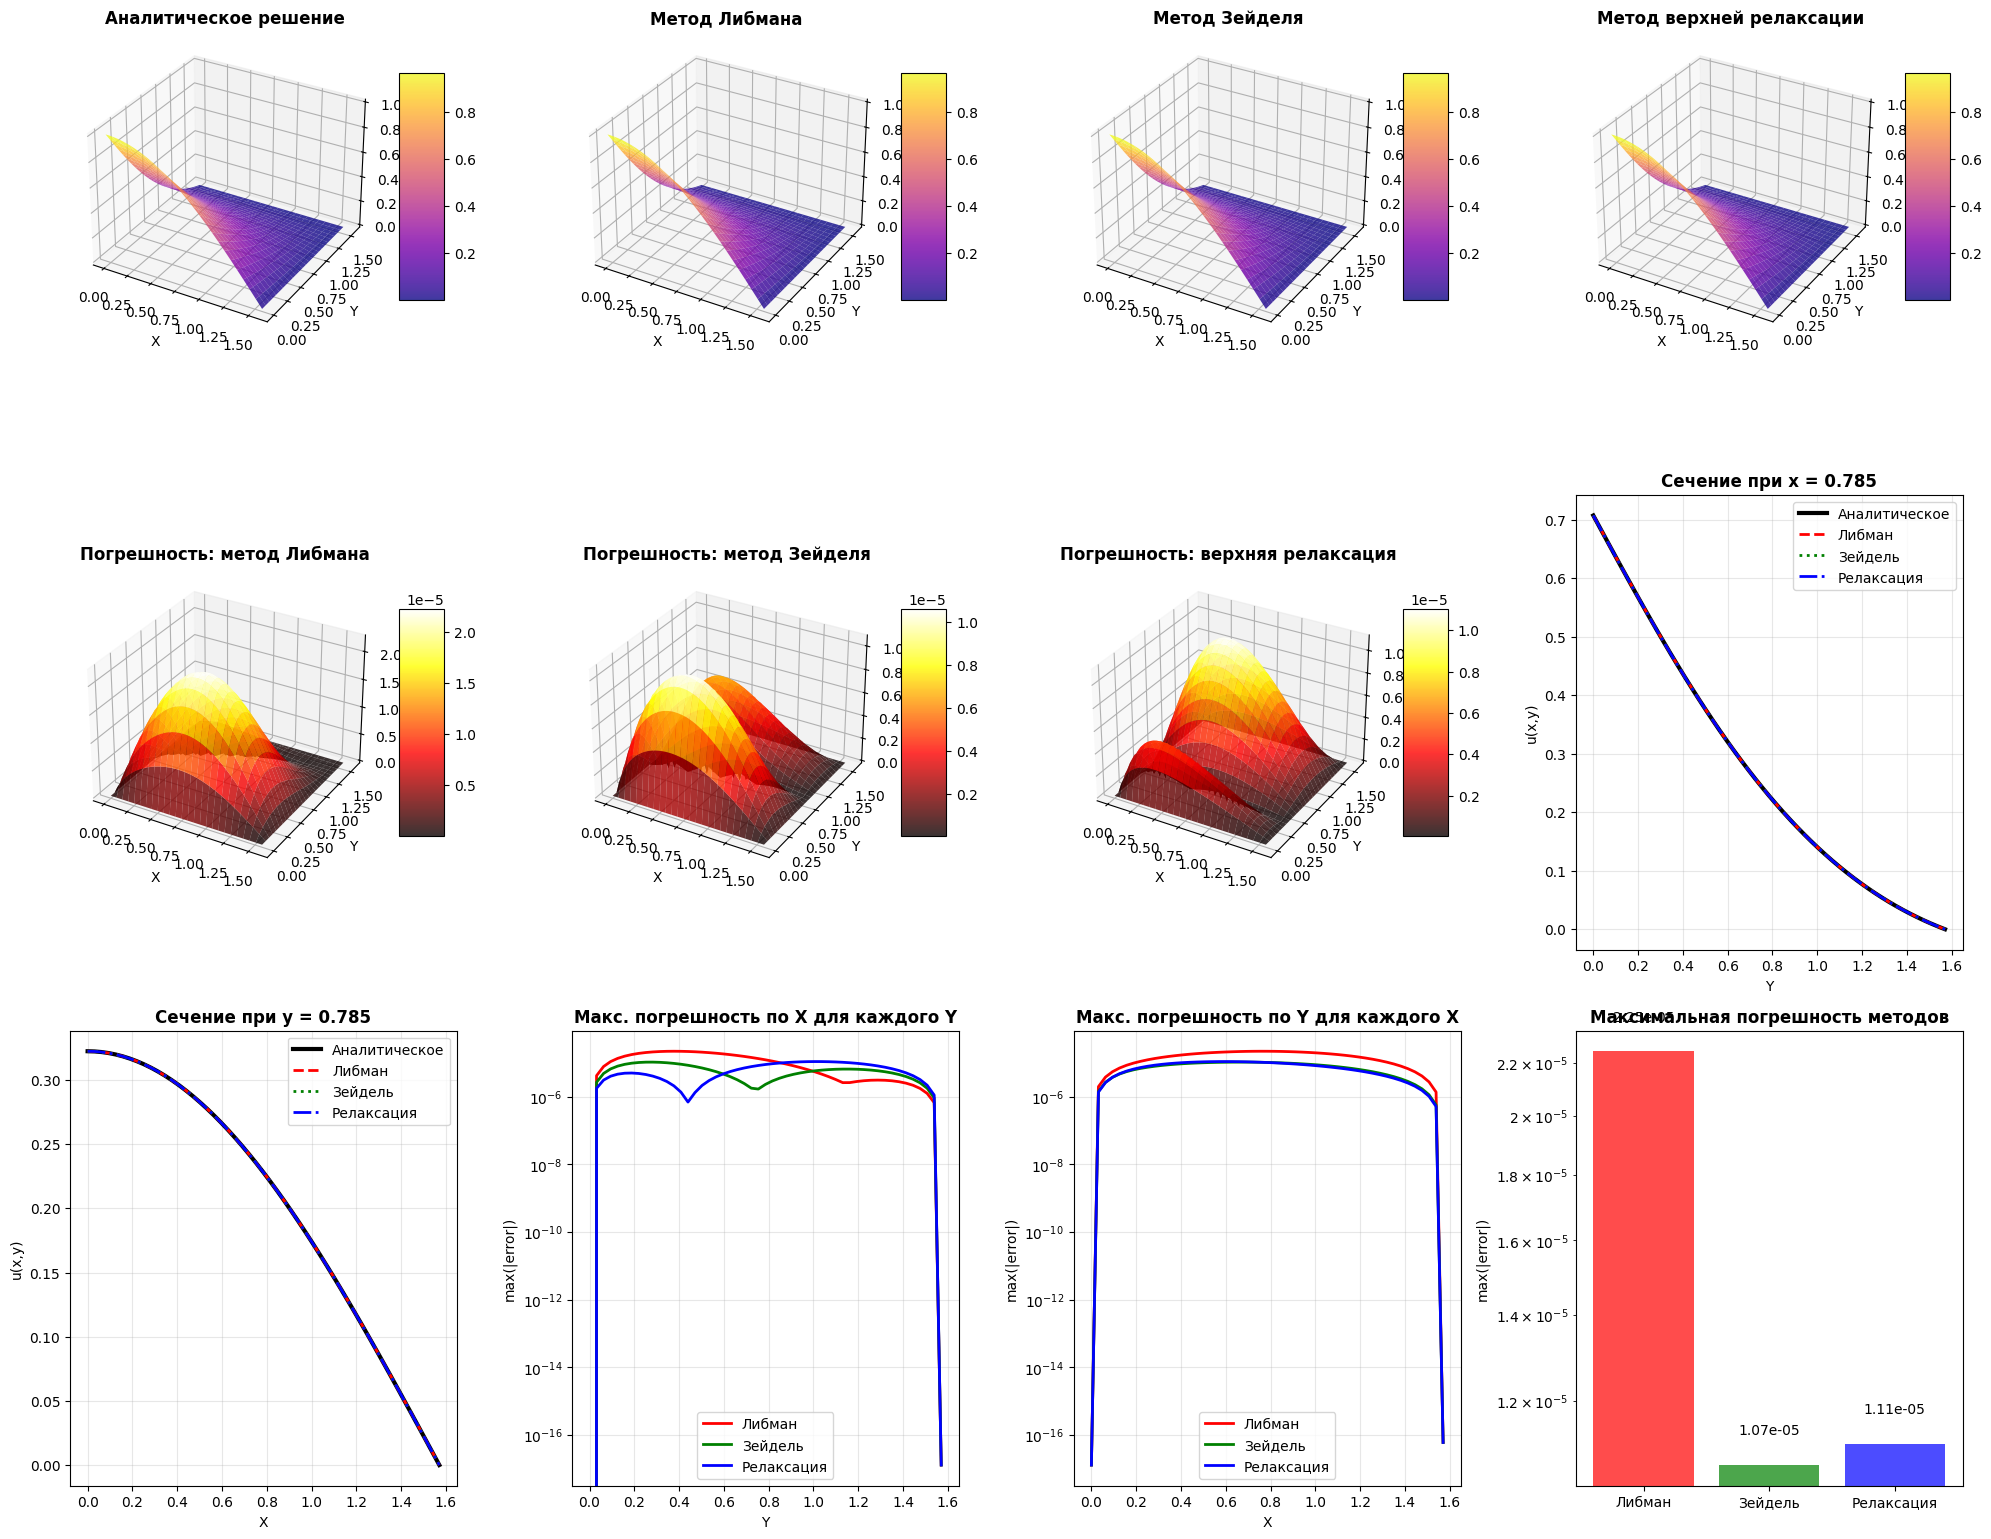

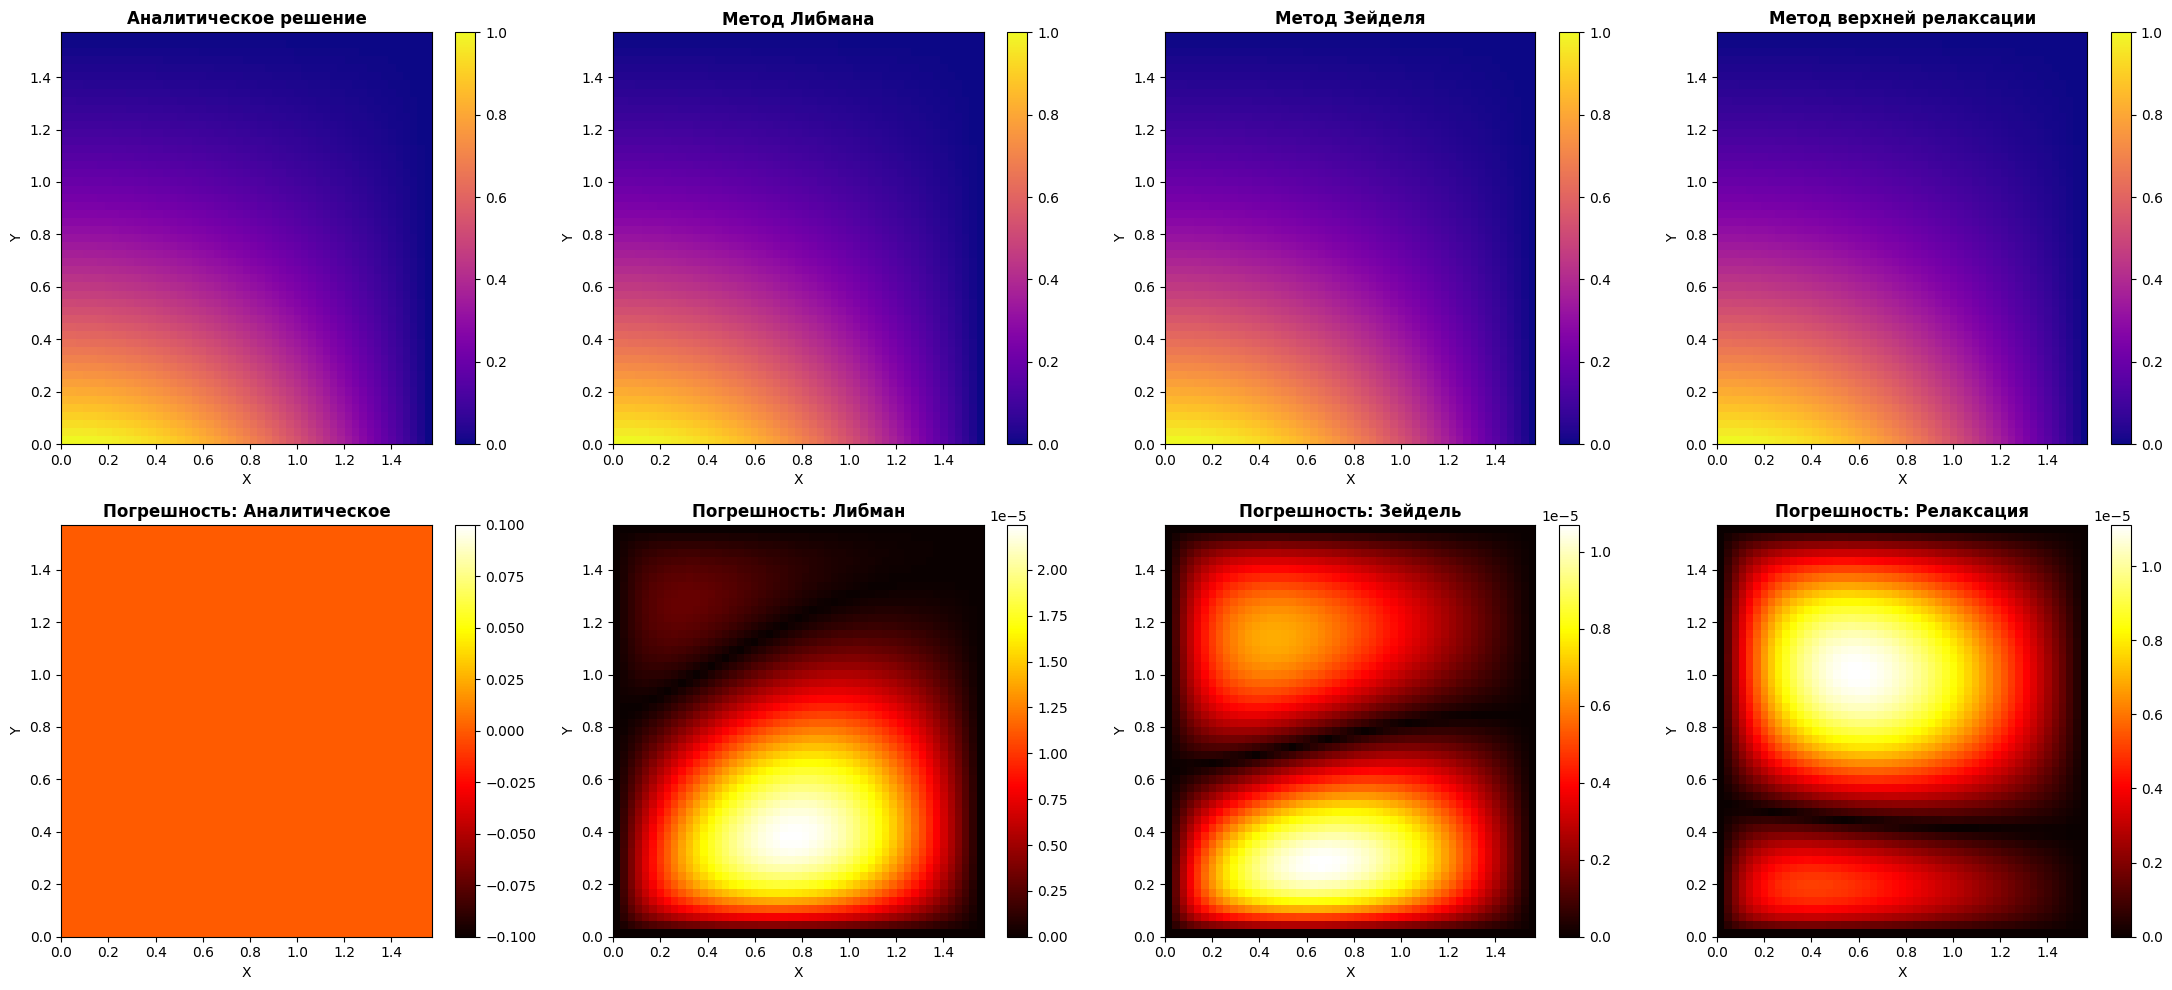

In [ ]:
# # Параметры сетки
Lx_count = 50
Ly_count = 50
X = np.linspace(0, Lx, Lx_count + 1)
Y = np.linspace(0, Ly, Ly_count + 1)
hx = Lx / Lx_count
hy = Ly / Ly_count

# Создаем сетку для 3D графиков
X_grid, Y_grid = np.meshgrid(X, Y, indexing='ij')

# Вычисляем аналитическое решение
u_analytical = analytical_solution(X_grid, Y_grid)

# Решаем уравнение разными методами
print("Решаем методом Либмана...")
u_libman = solve_elliptic_equation(X, Y, method="libman")

print("\nРешаем методом Зейделя...")
u_zeidel = solve_elliptic_equation(X, Y, method="zeidel")

print("\nРешаем методом верхней релаксации...")
u_relaxation = solve_elliptic_equation(X, Y, method="upper_relaxation")

# Вычисляем погрешности
error_libman = np.abs(u_libman - u_analytical)
error_zeidel = np.abs(u_zeidel - u_analytical)
error_relaxation = np.abs(u_relaxation - u_analytical)

print(f"\nМаксимальная погрешность:")
print(f"Метод Либмана: {np.max(error_libman):.2e}")
print(f"Метод Зейделя: {np.max(error_zeidel):.2e}")
print(f"Метод верхней релаксации: {np.max(error_relaxation):.2e}")

# Создаем графики
fig = plt.figure(figsize=(20, 16))

# 1. Аналитическое решение (3D)
ax1 = fig.add_subplot(3, 4, 1, projection='3d')
surf1 = ax1.plot_surface(X_grid, Y_grid, u_analytical, cmap=cm.plasma, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax1.set_title('Аналитическое решение', fontsize=12, fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('u(x,y)')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# 2. Численное решение методом Либмана (3D)
ax2 = fig.add_subplot(3, 4, 2, projection='3d')
surf2 = ax2.plot_surface(X_grid, Y_grid, u_libman, cmap=cm.plasma, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax2.set_title('Метод Либмана', fontsize=12, fontweight='bold')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('u(x,y)')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

# 3. Численное решение методом Зейделя (3D)
ax3 = fig.add_subplot(3, 4, 3, projection='3d')
surf3 = ax3.plot_surface(X_grid, Y_grid, u_zeidel, cmap=cm.plasma, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax3.set_title('Метод Зейделя', fontsize=12, fontweight='bold')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('u(x,y)')
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=5)

# 4. Численное решение методом верхней релаксации (3D)
ax4 = fig.add_subplot(3, 4, 4, projection='3d')
surf4 = ax4.plot_surface(X_grid, Y_grid, u_relaxation, cmap=cm.plasma, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax4.set_title('Метод верхней релаксации', fontsize=12, fontweight='bold')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('u(x,y)')
fig.colorbar(surf4, ax=ax4, shrink=0.5, aspect=5)

# 5. Погрешность метода Либмана (3D)
ax5 = fig.add_subplot(3, 4, 5, projection='3d')
surf5 = ax5.plot_surface(X_grid, Y_grid, error_libman, cmap=cm.hot, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax5.set_title('Погрешность: метод Либмана', fontsize=12, fontweight='bold')
ax5.set_xlabel('X')
ax5.set_ylabel('Y')
ax5.set_zlabel('|error|')
fig.colorbar(surf5, ax=ax5, shrink=0.5, aspect=5)

# 6. Погрешность метода Зейделя (3D)
ax6 = fig.add_subplot(3, 4, 6, projection='3d')
surf6 = ax6.plot_surface(X_grid, Y_grid, error_zeidel, cmap=cm.hot, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax6.set_title('Погрешность: метод Зейделя', fontsize=12, fontweight='bold')
ax6.set_xlabel('X')
ax6.set_ylabel('Y')
ax6.set_zlabel('|error|')
fig.colorbar(surf6, ax=ax6, shrink=0.5, aspect=5)

# 7. Погрешность метода верхней релаксации (3D)
ax7 = fig.add_subplot(3, 4, 7, projection='3d')
surf7 = ax7.plot_surface(X_grid, Y_grid, error_relaxation, cmap=cm.hot, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax7.set_title('Погрешность: верхняя релаксация', fontsize=12, fontweight='bold')
ax7.set_xlabel('X')
ax7.set_ylabel('Y')
ax7.set_zlabel('|error|')
fig.colorbar(surf7, ax=ax7, shrink=0.5, aspect=5)

# 8. Сравнение сечений при x = Lx/2
ax8 = fig.add_subplot(3, 4, 8)
x_idx = Lx_count // 2  # индекс для x = Lx/2
ax8.plot(Y, u_analytical[x_idx, :], 'k-', linewidth=3, label='Аналитическое')
ax8.plot(Y, u_libman[x_idx, :], 'r--', linewidth=2, label='Либман')
ax8.plot(Y, u_zeidel[x_idx, :], 'g:', linewidth=2, label='Зейдель')
ax8.plot(Y, u_relaxation[x_idx, :], 'b-.', linewidth=2, label='Релаксация')
ax8.set_title(f'Сечение при x = {X[x_idx]:.3f}', fontsize=12, fontweight='bold')
ax8.set_xlabel('Y')
ax8.set_ylabel('u(x,y)')
ax8.legend()
ax8.grid(True, alpha=0.3)

# 9. Сравнение сечений при y = Ly/2
ax9 = fig.add_subplot(3, 4, 9)
y_idx = Ly_count // 2  # индекс для y = Ly/2
ax9.plot(X, u_analytical[:, y_idx], 'k-', linewidth=3, label='Аналитическое')
ax9.plot(X, u_libman[:, y_idx], 'r--', linewidth=2, label='Либман')
ax9.plot(X, u_zeidel[:, y_idx], 'g:', linewidth=2, label='Зейдель')
ax9.plot(X, u_relaxation[:, y_idx], 'b-.', linewidth=2, label='Релаксация')
ax9.set_title(f'Сечение при y = {Y[y_idx]:.3f}', fontsize=12, fontweight='bold')
ax9.set_xlabel('X')
ax9.set_ylabel('u(x,y)')
ax9.legend()
ax9.grid(True, alpha=0.3)

# 10. Максимальная погрешность по X для каждого Y
ax10 = fig.add_subplot(3, 4, 10)
max_error_y_libman = np.max(error_libman, axis=0)
max_error_y_zeidel = np.max(error_zeidel, axis=0)
max_error_y_relaxation = np.max(error_relaxation, axis=0)

ax10.plot(Y, max_error_y_libman, 'r-', linewidth=2, label='Либман')
ax10.plot(Y, max_error_y_zeidel, 'g-', linewidth=2, label='Зейдель')
ax10.plot(Y, max_error_y_relaxation, 'b-', linewidth=2, label='Релаксация')
ax10.set_title('Макс. погрешность по X для каждого Y', fontsize=12, fontweight='bold')
ax10.set_xlabel('Y')
ax10.set_ylabel('max(|error|)')
ax10.set_yscale('log')
ax10.legend()
ax10.grid(True, alpha=0.3)

# 11. Максимальная погрешность по Y для каждого X
ax11 = fig.add_subplot(3, 4, 11)
max_error_x_libman = np.max(error_libman, axis=1)
max_error_x_zeidel = np.max(error_zeidel, axis=1)
max_error_x_relaxation = np.max(error_relaxation, axis=1)

ax11.plot(X, max_error_x_libman, 'r-', linewidth=2, label='Либман')
ax11.plot(X, max_error_x_zeidel, 'g-', linewidth=2, label='Зейдель')
ax11.plot(X, max_error_x_relaxation, 'b-', linewidth=2, label='Релаксация')
ax11.set_title('Макс. погрешность по Y для каждого X', fontsize=12, fontweight='bold')
ax11.set_xlabel('X')
ax11.set_ylabel('max(|error|)')
ax11.set_yscale('log')
ax11.legend()
ax11.grid(True, alpha=0.3)

# 12. Гистограмма погрешностей
ax12 = fig.add_subplot(3, 4, 12)
methods = ['Либман', 'Зейдель', 'Релаксация']
errors = [np.max(error_libman), np.max(error_zeidel), np.max(error_relaxation)]
colors = ['red', 'green', 'blue']

bars = ax12.bar(methods, errors, color=colors, alpha=0.7)
ax12.set_title('Максимальная погрешность методов', fontsize=12, fontweight='bold')
ax12.set_ylabel('max(|error|)')
ax12.set_yscale('log')

# Добавляем значения на столбцы
for bar, error in zip(bars, errors):
    height = bar.get_height()
    ax12.text(bar.get_x() + bar.get_width()/2., height*1.05,
             f'{error:.2e}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Дополнительный график: тепловые карты погрешностей
fig2, axes2 = plt.subplots(2, 4, figsize=(22, 10))

# Тепловая карта аналитического решения
im1 = axes2[0, 0].imshow(u_analytical.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.plasma, aspect='auto')
axes2[0, 0].set_title('Аналитическое решение', fontsize=12, fontweight='bold')
axes2[0, 0].set_xlabel('X')
axes2[0, 0].set_ylabel('Y')
plt.colorbar(im1, ax=axes2[0, 0])

# Тепловая карта погрешности аналитического решения (нулевая или разница с самим собой)
# Если нужно показать нулевую погрешность
zero_error = np.zeros_like(u_analytical)
im2 = axes2[1, 0].imshow(zero_error.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.hot, aspect='auto')
axes2[1, 0].set_title('Погрешность: Аналитическое', fontsize=12, fontweight='bold')
axes2[1, 0].set_xlabel('X')
axes2[1, 0].set_ylabel('Y')
plt.colorbar(im2, ax=axes2[1, 0])

# Тепловые карты численных решений и их погрешностей
# Метод Либмана
im3 = axes2[0, 1].imshow(u_libman.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.plasma, aspect='auto')
axes2[0, 1].set_title('Метод Либмана', fontsize=12, fontweight='bold')
axes2[0, 1].set_xlabel('X')
axes2[0, 1].set_ylabel('Y')
plt.colorbar(im3, ax=axes2[0, 1])

im4 = axes2[1, 1].imshow(error_libman.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.hot, aspect='auto')
axes2[1, 1].set_title('Погрешность: Либман', fontsize=12, fontweight='bold')
axes2[1, 1].set_xlabel('X')
axes2[1, 1].set_ylabel('Y')
plt.colorbar(im4, ax=axes2[1, 1])

# Метод Зейделя
im5 = axes2[0, 2].imshow(u_zeidel.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.plasma, aspect='auto')
axes2[0, 2].set_title('Метод Зейделя', fontsize=12, fontweight='bold')
axes2[0, 2].set_xlabel('X')
axes2[0, 2].set_ylabel('Y')
plt.colorbar(im5, ax=axes2[0, 2])

im6 = axes2[1, 2].imshow(error_zeidel.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.hot, aspect='auto')
axes2[1, 2].set_title('Погрешность: Зейдель', fontsize=12, fontweight='bold')
axes2[1, 2].set_xlabel('X')
axes2[1, 2].set_ylabel('Y')
plt.colorbar(im6, ax=axes2[1, 2])

# Метод верхней релаксации (предполагаю, что u_relaxation у вас есть)
im7 = axes2[0, 3].imshow(u_relaxation.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.plasma, aspect='auto')
axes2[0, 3].set_title('Метод верхней релаксации', fontsize=12, fontweight='bold')
axes2[0, 3].set_xlabel('X')
axes2[0, 3].set_ylabel('Y')
plt.colorbar(im7, ax=axes2[0, 3])

im8 = axes2[1, 3].imshow(error_relaxation.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.hot, aspect='auto')
axes2[1, 3].set_title('Погрешность: Релаксация', fontsize=12, fontweight='bold')
axes2[1, 3].set_xlabel('X')
axes2[1, 3].set_ylabel('Y')
plt.colorbar(im8, ax=axes2[1, 3])

plt.tight_layout()
plt.show()

Решаем методом Либмана...
Итерация 0, максимальное изменение: 1.21e-01
Итерация 100, максимальное изменение: 2.05e-03
Итерация 200, максимальное изменение: 8.65e-04
Итерация 300, максимальное изменение: 5.05e-04
Итерация 400, максимальное изменение: 2.87e-04
Итерация 500, максимальное изменение: 1.60e-04
Итерация 600, максимальное изменение: 8.86e-05
Итерация 700, максимальное изменение: 4.90e-05
Итерация 800, максимальное изменение: 2.71e-05
Итерация 900, максимальное изменение: 1.49e-05
Итерация 1000, максимальное изменение: 8.25e-06
Итерация 1100, максимальное изменение: 4.55e-06
Итерация 1200, максимальное изменение: 2.51e-06
Итерация 1300, максимальное изменение: 1.39e-06
Сходимость достигнута на итерации 1356

Решаем методом Зейделя...
Итерация 0, максимальное изменение: 1.69e-01
Итерация 100, максимальное изменение: 1.77e-03
Итерация 200, максимальное изменение: 5.96e-04
Итерация 300, максимальное изменение: 1.84e-04
Итерация 400, максимальное изменение: 5.62e-05
Итерация 500, м

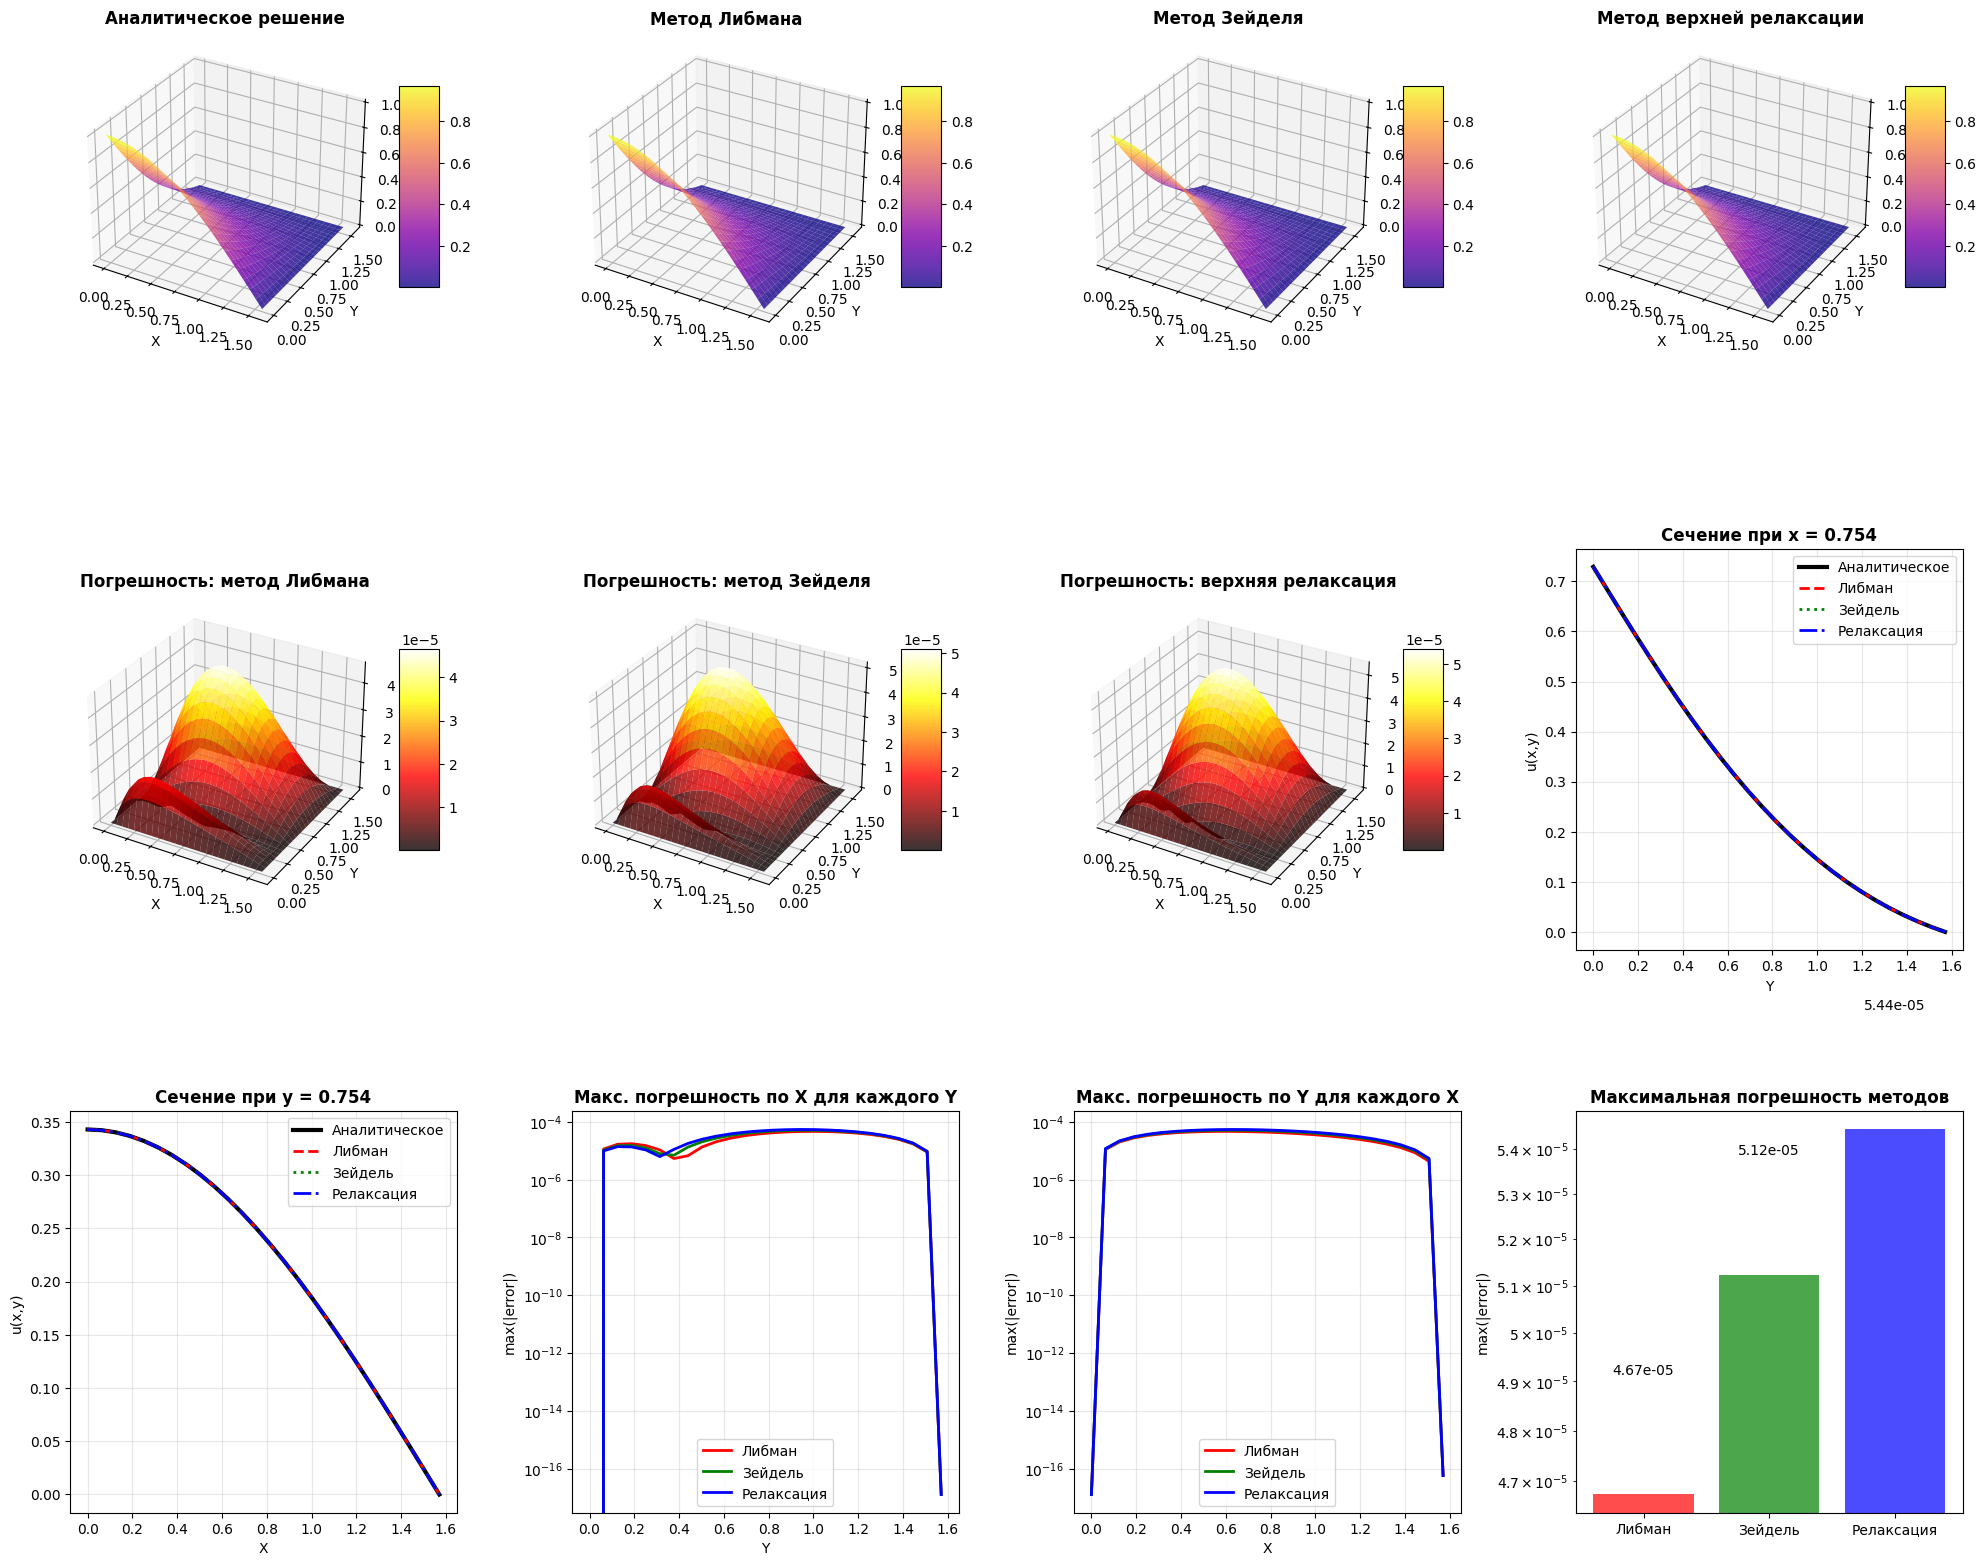

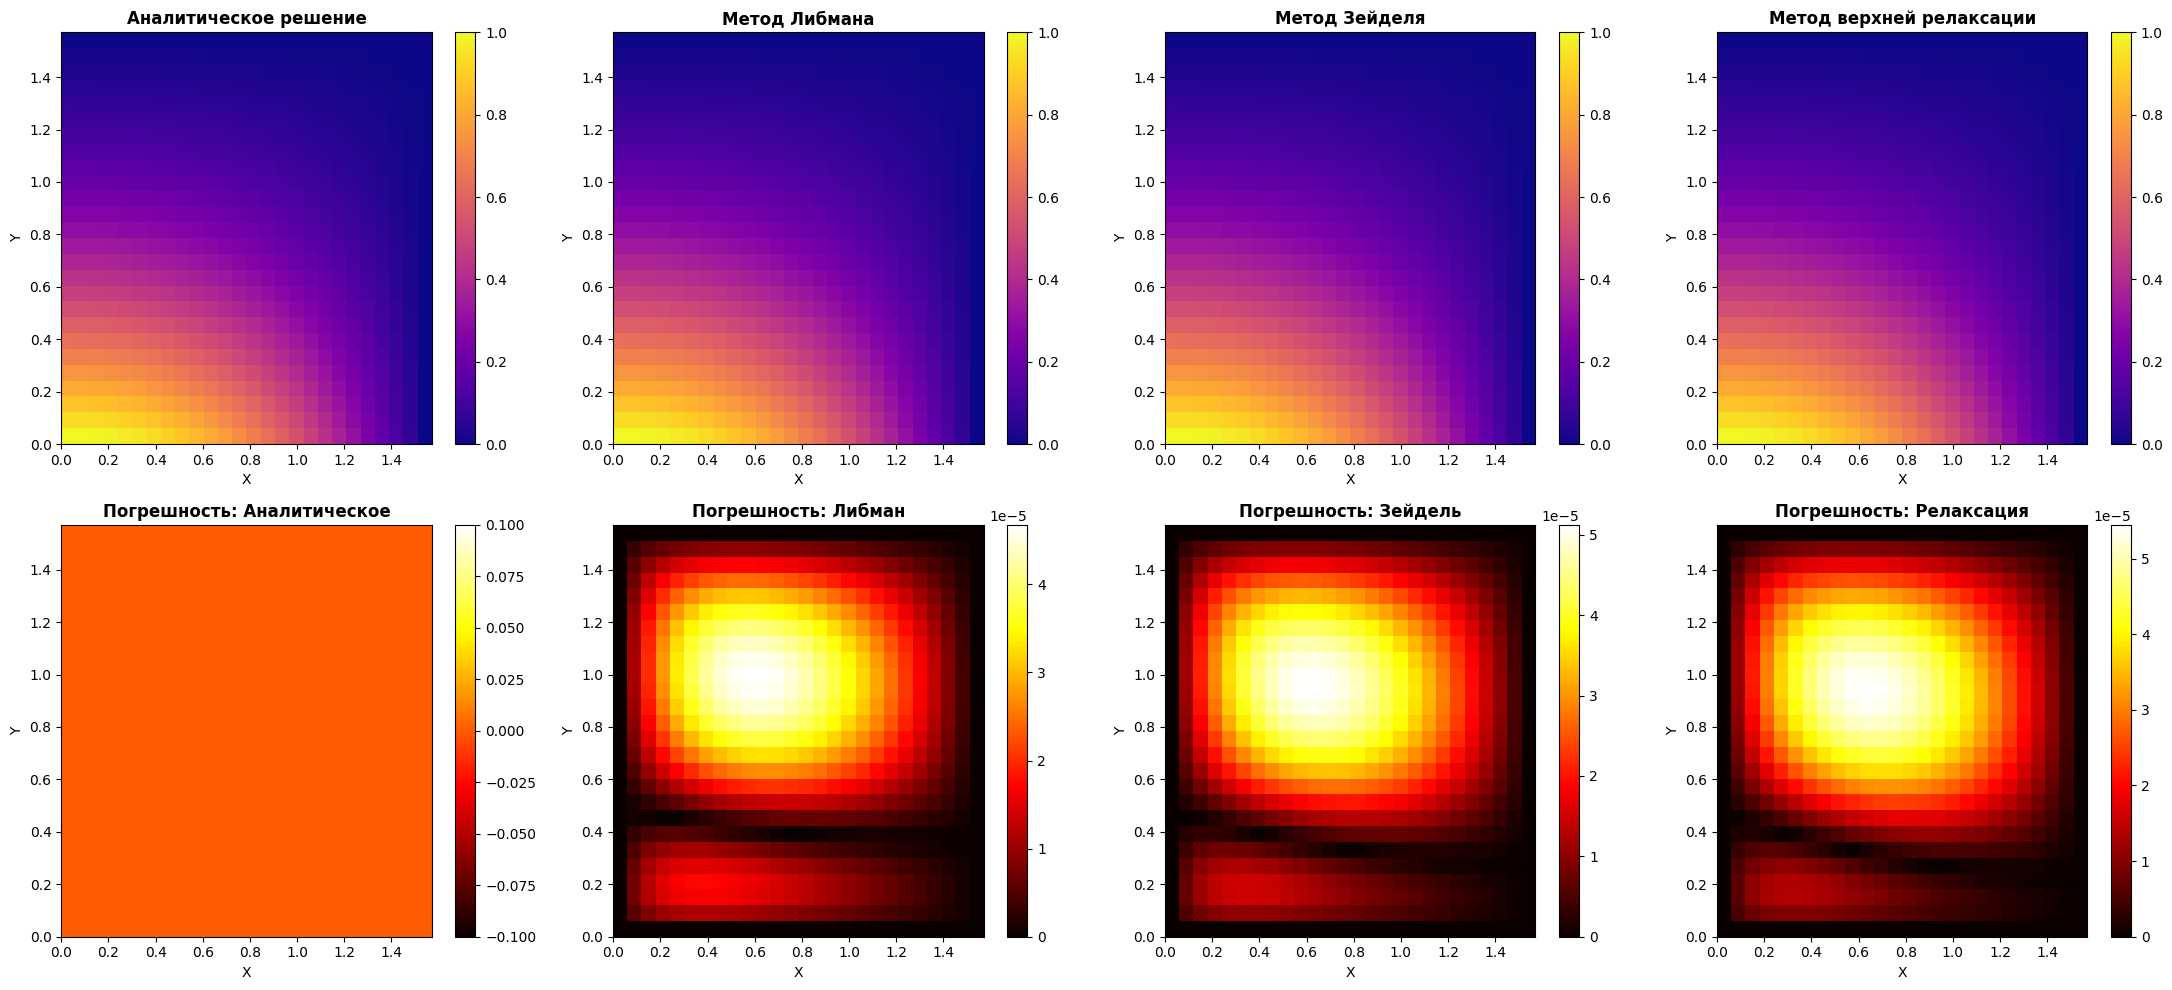

In [ ]:
# # Параметры сетки
Lx_count = 25
Ly_count = 25
X = np.linspace(0, Lx, Lx_count + 1)
Y = np.linspace(0, Ly, Ly_count + 1)
hx = Lx / Lx_count
hy = Ly / Ly_count

# Создаем сетку для 3D графиков
X_grid, Y_grid = np.meshgrid(X, Y, indexing='ij')

# Вычисляем аналитическое решение
u_analytical = analytical_solution(X_grid, Y_grid)

# Решаем уравнение разными методами
print("Решаем методом Либмана...")
u_libman = solve_elliptic_equation(X, Y, method="libman")

print("\nРешаем методом Зейделя...")
u_zeidel = solve_elliptic_equation(X, Y, method="zeidel")

print("\nРешаем методом верхней релаксации...")
u_relaxation = solve_elliptic_equation(X, Y, method="upper_relaxation")

# Вычисляем погрешности
error_libman = np.abs(u_libman - u_analytical)
error_zeidel = np.abs(u_zeidel - u_analytical)
error_relaxation = np.abs(u_relaxation - u_analytical)

print(f"\nМаксимальная погрешность:")
print(f"Метод Либмана: {np.max(error_libman):.2e}")
print(f"Метод Зейделя: {np.max(error_zeidel):.2e}")
print(f"Метод верхней релаксации: {np.max(error_relaxation):.2e}")

# Создаем графики
fig = plt.figure(figsize=(20, 16))

# 1. Аналитическое решение (3D)
ax1 = fig.add_subplot(3, 4, 1, projection='3d')
surf1 = ax1.plot_surface(X_grid, Y_grid, u_analytical, cmap=cm.plasma, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax1.set_title('Аналитическое решение', fontsize=12, fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('u(x,y)')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# 2. Численное решение методом Либмана (3D)
ax2 = fig.add_subplot(3, 4, 2, projection='3d')
surf2 = ax2.plot_surface(X_grid, Y_grid, u_libman, cmap=cm.plasma, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax2.set_title('Метод Либмана', fontsize=12, fontweight='bold')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('u(x,y)')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

# 3. Численное решение методом Зейделя (3D)
ax3 = fig.add_subplot(3, 4, 3, projection='3d')
surf3 = ax3.plot_surface(X_grid, Y_grid, u_zeidel, cmap=cm.plasma, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax3.set_title('Метод Зейделя', fontsize=12, fontweight='bold')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('u(x,y)')
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=5)

# 4. Численное решение методом верхней релаксации (3D)
ax4 = fig.add_subplot(3, 4, 4, projection='3d')
surf4 = ax4.plot_surface(X_grid, Y_grid, u_relaxation, cmap=cm.plasma, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax4.set_title('Метод верхней релаксации', fontsize=12, fontweight='bold')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('u(x,y)')
fig.colorbar(surf4, ax=ax4, shrink=0.5, aspect=5)

# 5. Погрешность метода Либмана (3D)
ax5 = fig.add_subplot(3, 4, 5, projection='3d')
surf5 = ax5.plot_surface(X_grid, Y_grid, error_libman, cmap=cm.hot, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax5.set_title('Погрешность: метод Либмана', fontsize=12, fontweight='bold')
ax5.set_xlabel('X')
ax5.set_ylabel('Y')
ax5.set_zlabel('|error|')
fig.colorbar(surf5, ax=ax5, shrink=0.5, aspect=5)

# 6. Погрешность метода Зейделя (3D)
ax6 = fig.add_subplot(3, 4, 6, projection='3d')
surf6 = ax6.plot_surface(X_grid, Y_grid, error_zeidel, cmap=cm.hot, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax6.set_title('Погрешность: метод Зейделя', fontsize=12, fontweight='bold')
ax6.set_xlabel('X')
ax6.set_ylabel('Y')
ax6.set_zlabel('|error|')
fig.colorbar(surf6, ax=ax6, shrink=0.5, aspect=5)

# 7. Погрешность метода верхней релаксации (3D)
ax7 = fig.add_subplot(3, 4, 7, projection='3d')
surf7 = ax7.plot_surface(X_grid, Y_grid, error_relaxation, cmap=cm.hot, 
                        linewidth=0, antialiased=True, alpha=0.8)
ax7.set_title('Погрешность: верхняя релаксация', fontsize=12, fontweight='bold')
ax7.set_xlabel('X')
ax7.set_ylabel('Y')
ax7.set_zlabel('|error|')
fig.colorbar(surf7, ax=ax7, shrink=0.5, aspect=5)

# 8. Сравнение сечений при x = Lx/2
ax8 = fig.add_subplot(3, 4, 8)
x_idx = Lx_count // 2  # индекс для x = Lx/2
ax8.plot(Y, u_analytical[x_idx, :], 'k-', linewidth=3, label='Аналитическое')
ax8.plot(Y, u_libman[x_idx, :], 'r--', linewidth=2, label='Либман')
ax8.plot(Y, u_zeidel[x_idx, :], 'g:', linewidth=2, label='Зейдель')
ax8.plot(Y, u_relaxation[x_idx, :], 'b-.', linewidth=2, label='Релаксация')
ax8.set_title(f'Сечение при x = {X[x_idx]:.3f}', fontsize=12, fontweight='bold')
ax8.set_xlabel('Y')
ax8.set_ylabel('u(x,y)')
ax8.legend()
ax8.grid(True, alpha=0.3)

# 9. Сравнение сечений при y = Ly/2
ax9 = fig.add_subplot(3, 4, 9)
y_idx = Ly_count // 2  # индекс для y = Ly/2
ax9.plot(X, u_analytical[:, y_idx], 'k-', linewidth=3, label='Аналитическое')
ax9.plot(X, u_libman[:, y_idx], 'r--', linewidth=2, label='Либман')
ax9.plot(X, u_zeidel[:, y_idx], 'g:', linewidth=2, label='Зейдель')
ax9.plot(X, u_relaxation[:, y_idx], 'b-.', linewidth=2, label='Релаксация')
ax9.set_title(f'Сечение при y = {Y[y_idx]:.3f}', fontsize=12, fontweight='bold')
ax9.set_xlabel('X')
ax9.set_ylabel('u(x,y)')
ax9.legend()
ax9.grid(True, alpha=0.3)

# 10. Максимальная погрешность по X для каждого Y
ax10 = fig.add_subplot(3, 4, 10)
max_error_y_libman = np.max(error_libman, axis=0)
max_error_y_zeidel = np.max(error_zeidel, axis=0)
max_error_y_relaxation = np.max(error_relaxation, axis=0)

ax10.plot(Y, max_error_y_libman, 'r-', linewidth=2, label='Либман')
ax10.plot(Y, max_error_y_zeidel, 'g-', linewidth=2, label='Зейдель')
ax10.plot(Y, max_error_y_relaxation, 'b-', linewidth=2, label='Релаксация')
ax10.set_title('Макс. погрешность по X для каждого Y', fontsize=12, fontweight='bold')
ax10.set_xlabel('Y')
ax10.set_ylabel('max(|error|)')
ax10.set_yscale('log')
ax10.legend()
ax10.grid(True, alpha=0.3)

# 11. Максимальная погрешность по Y для каждого X
ax11 = fig.add_subplot(3, 4, 11)
max_error_x_libman = np.max(error_libman, axis=1)
max_error_x_zeidel = np.max(error_zeidel, axis=1)
max_error_x_relaxation = np.max(error_relaxation, axis=1)

ax11.plot(X, max_error_x_libman, 'r-', linewidth=2, label='Либман')
ax11.plot(X, max_error_x_zeidel, 'g-', linewidth=2, label='Зейдель')
ax11.plot(X, max_error_x_relaxation, 'b-', linewidth=2, label='Релаксация')
ax11.set_title('Макс. погрешность по Y для каждого X', fontsize=12, fontweight='bold')
ax11.set_xlabel('X')
ax11.set_ylabel('max(|error|)')
ax11.set_yscale('log')
ax11.legend()
ax11.grid(True, alpha=0.3)

# 12. Гистограмма погрешностей
ax12 = fig.add_subplot(3, 4, 12)
methods = ['Либман', 'Зейдель', 'Релаксация']
errors = [np.max(error_libman), np.max(error_zeidel), np.max(error_relaxation)]
colors = ['red', 'green', 'blue']

bars = ax12.bar(methods, errors, color=colors, alpha=0.7)
ax12.set_title('Максимальная погрешность методов', fontsize=12, fontweight='bold')
ax12.set_ylabel('max(|error|)')
ax12.set_yscale('log')

# Добавляем значения на столбцы
for bar, error in zip(bars, errors):
    height = bar.get_height()
    ax12.text(bar.get_x() + bar.get_width()/2., height*1.05,
             f'{error:.2e}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Дополнительный график: тепловые карты погрешностей
fig2, axes2 = plt.subplots(2, 4, figsize=(22, 10))

# Тепловая карта аналитического решения
im1 = axes2[0, 0].imshow(u_analytical.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.plasma, aspect='auto')
axes2[0, 0].set_title('Аналитическое решение', fontsize=12, fontweight='bold')
axes2[0, 0].set_xlabel('X')
axes2[0, 0].set_ylabel('Y')
plt.colorbar(im1, ax=axes2[0, 0])

# Тепловая карта погрешности аналитического решения (нулевая или разница с самим собой)
# Если нужно показать нулевую погрешность
zero_error = np.zeros_like(u_analytical)
im2 = axes2[1, 0].imshow(zero_error.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.hot, aspect='auto')
axes2[1, 0].set_title('Погрешность: Аналитическое', fontsize=12, fontweight='bold')
axes2[1, 0].set_xlabel('X')
axes2[1, 0].set_ylabel('Y')
plt.colorbar(im2, ax=axes2[1, 0])

# Тепловые карты численных решений и их погрешностей
# Метод Либмана
im3 = axes2[0, 1].imshow(u_libman.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.plasma, aspect='auto')
axes2[0, 1].set_title('Метод Либмана', fontsize=12, fontweight='bold')
axes2[0, 1].set_xlabel('X')
axes2[0, 1].set_ylabel('Y')
plt.colorbar(im3, ax=axes2[0, 1])

im4 = axes2[1, 1].imshow(error_libman.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.hot, aspect='auto')
axes2[1, 1].set_title('Погрешность: Либман', fontsize=12, fontweight='bold')
axes2[1, 1].set_xlabel('X')
axes2[1, 1].set_ylabel('Y')
plt.colorbar(im4, ax=axes2[1, 1])

# Метод Зейделя
im5 = axes2[0, 2].imshow(u_zeidel.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.plasma, aspect='auto')
axes2[0, 2].set_title('Метод Зейделя', fontsize=12, fontweight='bold')
axes2[0, 2].set_xlabel('X')
axes2[0, 2].set_ylabel('Y')
plt.colorbar(im5, ax=axes2[0, 2])

im6 = axes2[1, 2].imshow(error_zeidel.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.hot, aspect='auto')
axes2[1, 2].set_title('Погрешность: Зейдель', fontsize=12, fontweight='bold')
axes2[1, 2].set_xlabel('X')
axes2[1, 2].set_ylabel('Y')
plt.colorbar(im6, ax=axes2[1, 2])

# Метод верхней релаксации (предполагаю, что u_relaxation у вас есть)
im7 = axes2[0, 3].imshow(u_relaxation.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.plasma, aspect='auto')
axes2[0, 3].set_title('Метод верхней релаксации', fontsize=12, fontweight='bold')
axes2[0, 3].set_xlabel('X')
axes2[0, 3].set_ylabel('Y')
plt.colorbar(im7, ax=axes2[0, 3])

im8 = axes2[1, 3].imshow(error_relaxation.T, extent=[0, Lx, 0, Ly], 
                        origin='lower', cmap=cm.hot, aspect='auto')
axes2[1, 3].set_title('Погрешность: Релаксация', fontsize=12, fontweight='bold')
axes2[1, 3].set_xlabel('X')
axes2[1, 3].set_ylabel('Y')
plt.colorbar(im8, ax=axes2[1, 3])

plt.tight_layout()
plt.show()